# Compression Limits

An exploratory notebook about compression limits and distance.

More information is available on [ACEScentral](https://community.acescentral.com/t/notice-of-meeting-aces-gamut-mapping-vwg-meeting-15-6-4-2020/2915/4?u=thomas_mansencal).

## colour-science Requirements

In [ ]:
!pip install -q colour-science

!pip uninstall -y colour-science
!if ! [ -d "colour" ]; then git clone https://github.com/colour-science/colour; fi
!if [ -d "colour" ]; then cd colour && git fetch && git checkout develop && git pull && cd ..; fi

!python -c "import imageio;imageio.plugins.freeimage.download()"

Uninstalling colour-science-0.3.15:
  Successfully uninstalled colour-science-0.3.15
Already on 'develop'
Your branch is up to date with 'origin/develop'.
Already up to date.


In [ ]:
from __future__ import division, unicode_literals

import sys

sys.path.append('colour')

import colour
import matplotlib.pyplot as plt
import numpy as np

np.set_printoptions(formatter={'float': '{:0.8f}'.format}, suppress=True)

colour.plotting.colour_style()

colour.utilities.describe_environment();

*                                                                             *
*   Interpreter :                                                             *
*       python : 3.6.9 (default, Apr 18 2020, 01:56:04)                       *
*                [GCC 8.4.0]                                                  *
*                                                                             *
*   colour-science.org :                                                      *
*       colour : v0.3.15-169-g14bc07e1                                        *
*                                                                             *
*   Runtime :                                                                 *
*       imageio : 2.4.1                                                       *
*       matplotlib : 3.2.1                                                    *
*       networkx : 2.4                                                        *
*       numpy : 1.18.5                  

## Compression Limits Figures

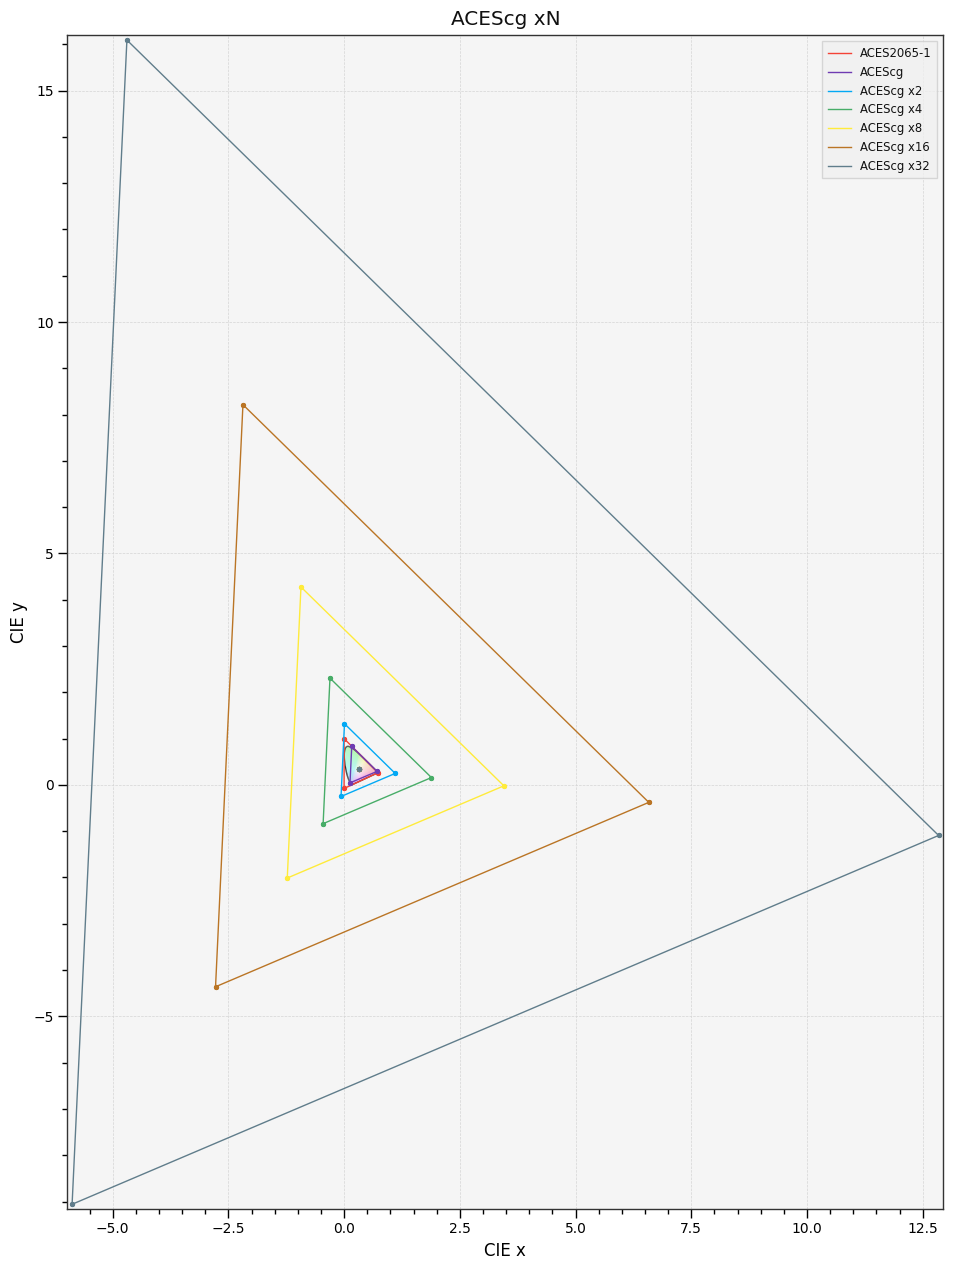

In [ ]:
WORKING_SPACE = colour.models.ACES_CG_COLOURSPACE
WORKING_SPACE_M = []

for i in [2, 4, 8, 16, 32]:
    p = WORKING_SPACE.primaries.copy()
    p -= WORKING_SPACE.whitepoint
    p *= i
    p += WORKING_SPACE.whitepoint

    working_space_m = colour.RGB_Colourspace(
        '{0} x{1}'.format(WORKING_SPACE.name, i),
        p,
        WORKING_SPACE.whitepoint,
        use_derived_RGB_to_XYZ_matrix=True,
        use_derived_XYZ_to_RGB_matrix=True,
        )
    WORKING_SPACE_M.append(working_space_m)

colour.plotting.plot_RGB_colourspaces_in_chromaticity_diagram_CIE1931(
    colourspaces=['ACES2065-1'] + [WORKING_SPACE] + WORKING_SPACE_M,
    diagram_opacity=0.25,
    spectral_locus_labels=[],
    title='{0} xN'.format(WORKING_SPACE.name));

In [ ]:
ACESCG_X = WORKING_SPACE_M[-1]

XYZ = colour.xy_to_XYZ(ACESCG_X.primaries)
RGB = colour.XYZ_to_RGB(XYZ, ACESCG_X.whitepoint, ACESCG_X.whitepoint,
                        ACESCG_X.XYZ_to_RGB_matrix)

print(colour.RGB_to_RGB(RGB, ACESCG_X, WORKING_SPACE))

[[-21.95870677 9.58788939 9.58788939]
 [-0.65048598 1.79800924 -0.65048598]
 [1.15541233 1.15541233 -1.73923715]]


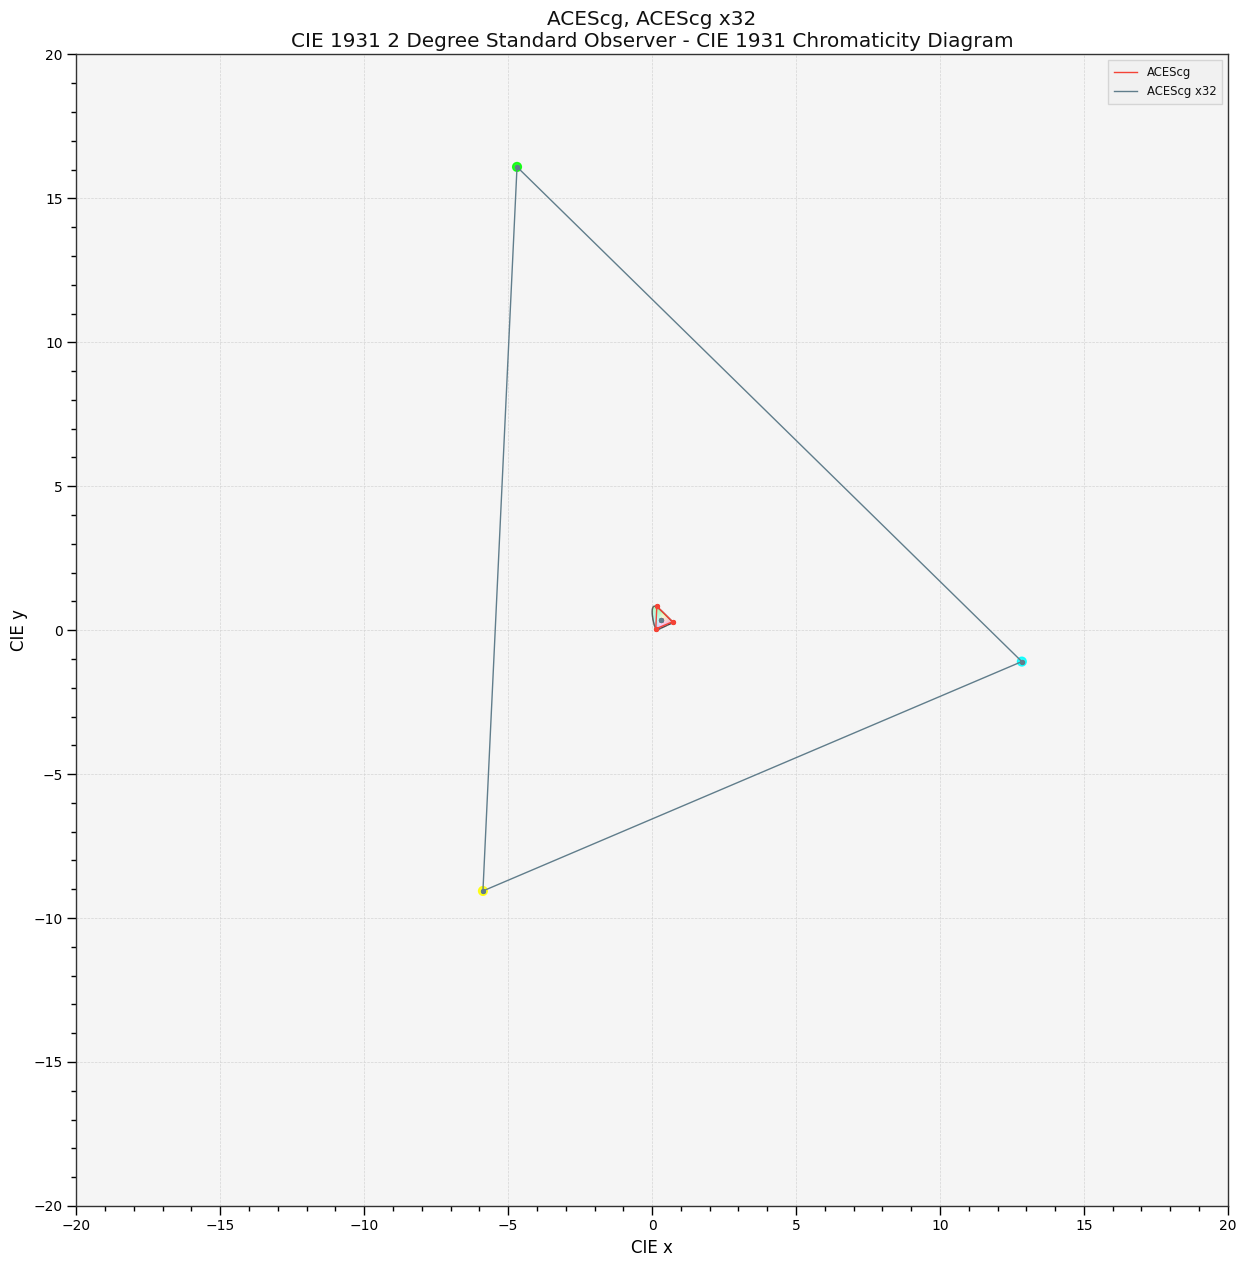

In [ ]:
colour.plotting.plot_RGB_chromaticities_in_chromaticity_diagram_CIE1931(
    RGB,
    colourspace=ACESCG_X,
    colourspaces=['ACEScg'] + [ACESCG_X],
    diagram_opacity=0.25,
    spectral_locus_labels=[],
    bounding_box=[-20, 20, -20, 20]);